In [2]:
# reference: https://github.com/GradientTrader
from importlib import reload

## Benchmarks (baselines)

In [3]:
import simple_agents
reload(simple_agents)
from simple_agents import RandomAgent

In [104]:
import utils
reload(utils)
from utils import *

In [5]:
import datetime

In [4]:
# num_coins_per_order = 100 #0 means buy/sell all per order
# recent_k = 500
# epsilon_min = 0.0

In [6]:
env = Environment()

In [66]:
# env.step()
# env.getState()

USDT_BTC_high             429.000000
USDT_BTC_low              429.000000
USDT_BTC_close            429.000000
USDT_BTC_open             429.000000
USDT_BTC_volume             0.000000
USDT_BTC_quoteVolume        0.000000
USDT_BTC_weighted_mean    427.357638
USDT_BTC_volatility         0.000000
USDT_BTC_pctChange         -0.001191
Name: 2016-01-03 10:00:00, dtype: float64

In [65]:
def run_random_agent(coin_name="BTC", num_coins_per_order=100, recent_k=0):
    ra = RandomAgent(Action)
#     env = Environment(coin_name=coin_name, recent_k=recent_k)
    portfolio = Portfolio(cash_supply=1e6)

    is_done = False # is this the end of the window
    state = env.getState() # state includes BTC price

    to_plot = []
    # before any action
    to_plot.append((env.getCurrentPrice(), portfolio.portfolio_coin, portfolio.portfolio_cash, Action.HOLD))
    while not is_done:
        action = ra.get_action()
        if (env.current_index - env.start_index) / env.time_delta % 24 == 0:
            verbose = True
            print('Current time:', env.current_index)
        else:
            verbose = False
        current_price = env.getCurrentPrice()
        action = portfolio.apply_action(current_price, action, verbose=verbose)
        is_done, state = env.step()
        # append price and portfolio after the action
        to_plot.append((current_price, portfolio.portfolio_coin, portfolio.portfolio_cash, action))

    print("Initial cash supply:", portfolio.starting_cash)
    print("Final holdings:", portfolio.getCurrentHoldings(env.getCurrentPrice()))
    return to_plot, portfolio.getReturnsPercent(env.getCurrentPrice())

In [105]:
env.reset()
now = datetime.datetime(2018,1,21,0)
env.set_current_time(now)
to_plot, _ = run_random_agent(coin_name="BTC", num_coins_per_order=100, recent_k=0)
print("Started trading at", now)

Current time: 2018-01-21 13:00:00
Action start Action.HOLD Total value before action 942155.3539540679
Action end: Action.HOLD , Total value now: 942155.354.  Return since entry: -5.784 %

Current time: 2018-01-22 13:00:00
Action start Action.SELL Total value before action 948483.460091353
Before selling: coin:83.966, cash:0.000, sell price:11296.000
After selling: coin sold:83.966, coin now:0.000, cash now:946112.251
Action end: Action.SELL , Total value now: 946112.251.  Return since entry: -5.389 %

Current time: 2018-01-23 13:00:00
Action start Action.BUY Total value before action 906831.7492195813
Before buying: coin:0.000, cash:906831.749, buy price:10200.000
After buying: coin bought:88.683, coin now:88.683, cash now:0.000
Action end: Action.BUY , Total value now: 904570.323.  Return since entry: -9.543 %

Current time: 2018-01-24 13:00:00
Action start Action.SELL Total value before action 892418.6606514067
Before selling: coin:0.000, cash:892418.661, sell price:11300.000
After 

Action end: Action.SELL , Total value now: 515903.887.  Return since entry: -48.410 %

Current time: 2018-02-20 13:00:00
Action start Action.SELL Total value before action 519454.5107666992
Before selling: coin:45.447, cash:0.000, sell price:11430.000
After selling: coin sold:45.447, coin now:0.000, cash now:518155.874
Action end: Action.SELL , Total value now: 518155.874.  Return since entry: -48.184 %

Current time: 2018-02-21 13:00:00
Action start Action.SELL Total value before action 517760.6375762252
Before selling: coin:0.000, cash:517760.638, sell price:11005.000
After selling: coin sold:0.000, coin now:0.000, cash now:517760.638
Action end: Action.HOLD , Total value now: 517760.638.  Return since entry: -48.224 %

Current time: 2018-02-22 13:00:00
Action start Action.HOLD Total value before action 474460.1367311702
Action end: Action.HOLD , Total value now: 474460.137.  Return since entry: -52.554 %

Current time: 2018-02-23 13:00:00
Action start Action.HOLD Total value before 

After buying: coin bought:0.000, coin now:27.052, cash now:0.000
Action end: Action.HOLD , Total value now: 239679.973.  Return since entry: -76.032 %

Current time: 2018-03-25 13:00:00
Action start Action.BUY Total value before action 227523.18334778657
Before buying: coin:0.000, cash:227523.183, buy price:8510.175
After buying: coin bought:26.669, coin now:26.669, cash now:0.000
Action end: Action.BUY , Total value now: 226955.794.  Return since entry: -77.304 %

Current time: 2018-03-26 13:00:00
Action start Action.SELL Total value before action 220716.71813503405
Before selling: coin:0.000, cash:220716.718, sell price:8123.000
After selling: coin sold:0.000, coin now:0.000, cash now:220716.718
Action end: Action.HOLD , Total value now: 220716.718.  Return since entry: -77.928 %

Current time: 2018-03-27 13:00:00
Action start Action.BUY Total value before action 215922.07641532965
Before buying: coin:0.000, cash:215922.076, buy price:7948.000
After buying: coin bought:27.099, coin n

## Visualize the transaction history

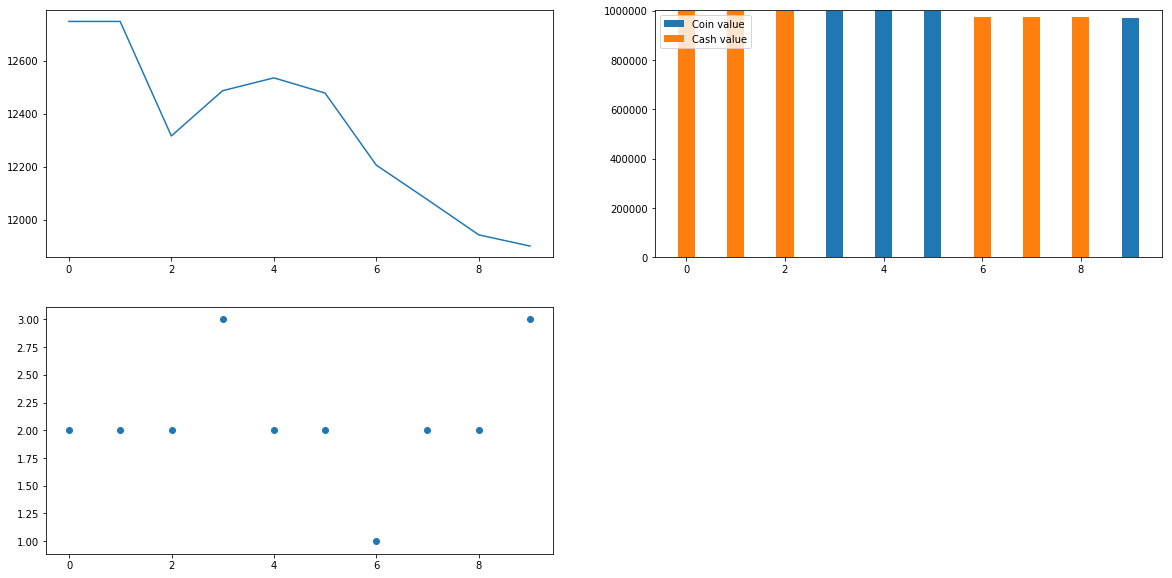

In [98]:
give_me_three_plots(to_plot, 0, 10, 1)

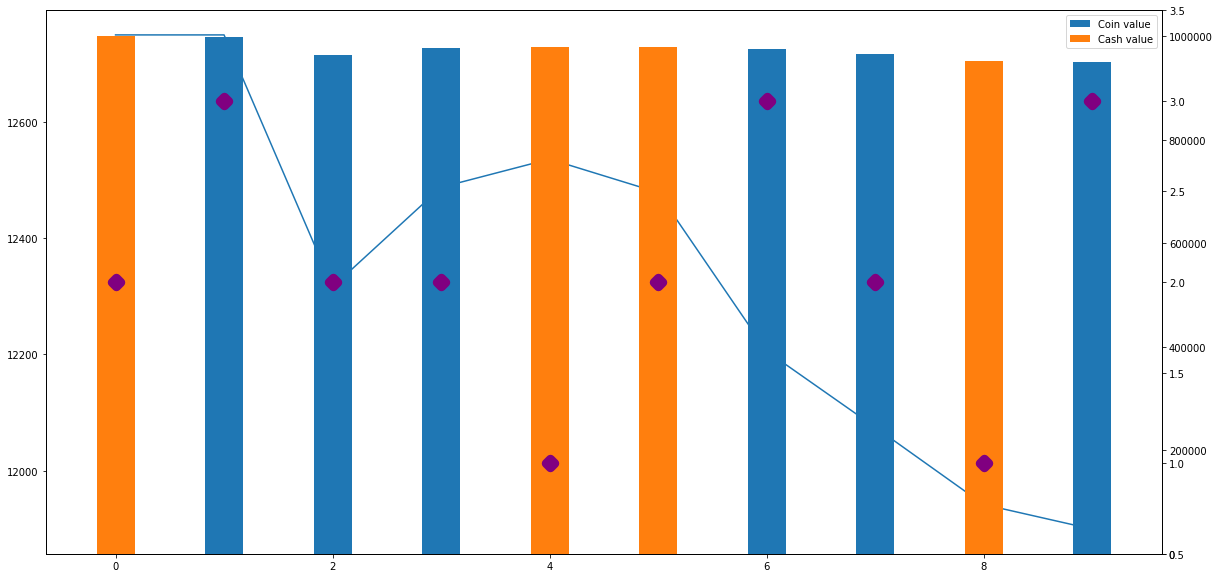

In [106]:
give_me_one_plot(to_plot, 0, 10, 1)

In [103]:
prices, coin, cash, action = zip(*to_plot)
action[:10]

(<Action.HOLD: 0>,
 <Action.HOLD: 0>,
 <Action.HOLD: 0>,
 <Action.HOLD: 0>,
 <Action.HOLD: 0>,
 <Action.HOLD: 0>,
 <Action.HOLD: 0>,
 <Action.HOLD: 0>,
 <Action.BUY: 1>,
 <Action.HOLD: 0>)

## Reinforcement Learning Agent

### To be implemented